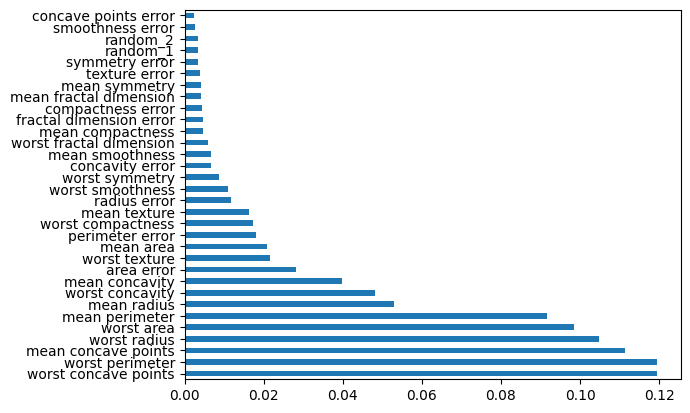

Cross-validation accuracy: 0.95 (+/- 0.04)
Cross-validation accuracy (top 20 features): 0.96 (+/- 0.04)


In [2]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
x_data = pd.DataFrame(data.data, columns=data.feature_names)
y_data = pd.Series(data.target)

# Add two columns with random values to the DataFrame
x_data['random_1'] = np.random.rand(x_data.shape[0])
x_data['random_2'] = np.random.rand(x_data.shape[0])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

# Create an Random Forest classifier
model_rf = RandomForestClassifier()

# Train the classifier on the training data
model_rf.fit(x_data, y_data)

############### Calculate the feature importance
feat_importances = pd.Series(model_rf.feature_importances_, index=x_data.columns)
feat_importances.nlargest(100).plot(kind='barh')
plt.show()

# Perform cross-validation with accuracy as the scoring metric
scores = cross_val_score(model_rf, x_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')

# Select the top 20 features based on their importance scores
top_features = feat_importances.nlargest(20).index
x_data_top = x_data[top_features]

# Recalculate the cross-validation using only the top 20 features
scores_top = cross_val_score(model_rf, x_data_top, y_data, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy (top 20 features): {scores_top.mean():.2f} (+/- {scores_top.std() * 2:.2f})')
